# 決定木

In [40]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# データ準備
df = sns.load_dataset('tips')
df = pd.get_dummies(df, drop_first=True, dtype=int)
y_col = 'tip'
X = df.drop(columns=[y_col])
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [15]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import  mean_squared_error
mean_squared_error(y_test,y_pred)

1.1060246260428703

In [20]:
# R-squared
model.score(X_test, y_test)

0.3590618660303134

## 決定木の描写

In [38]:
y_mean = y_train.loc[X_train[X_train['total_bill']>20.49].index].mean()
y_mean

3.948

In [44]:
y_data = y_train.loc[X_train[X_train['total_bill']>20.49].index]
np.sum((y_data-y_mean)**2)/len(y_data)

2.4760190769230768

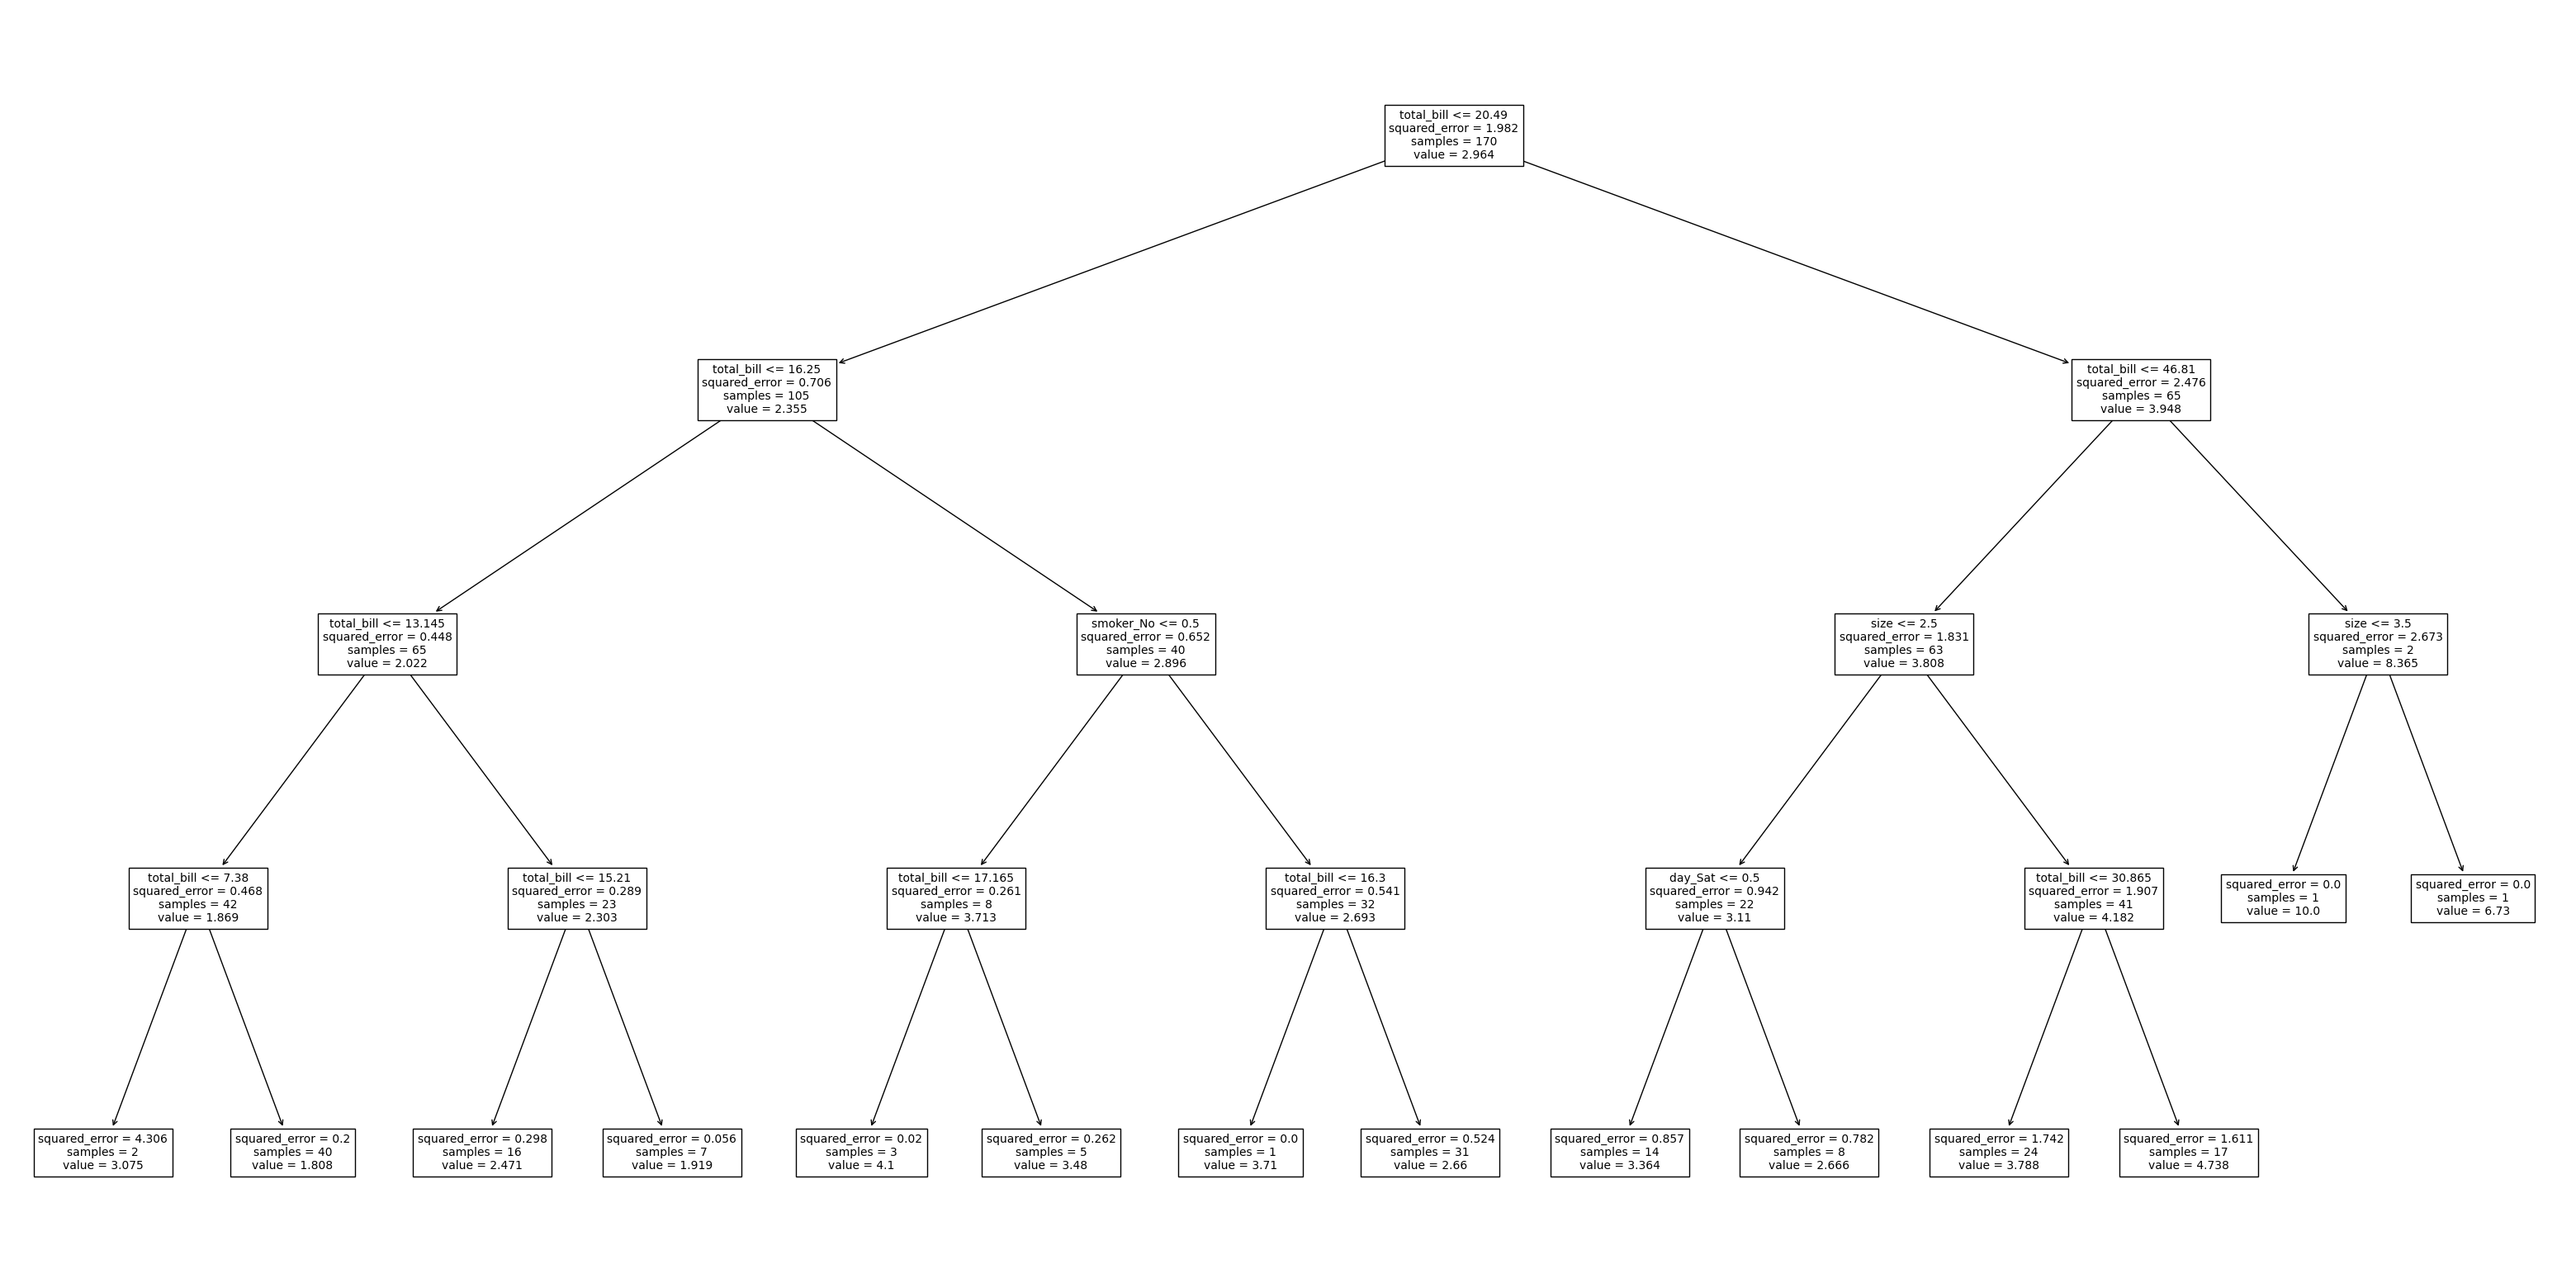

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model, fontsize=10, feature_names=model.feature_names_in_)

In [28]:
print(tree.export_text(model, feature_names=model.feature_names_in_))

|--- total_bill <= 20.49
|   |--- total_bill <= 16.25
|   |   |--- total_bill <= 13.14
|   |   |   |--- total_bill <= 7.38
|   |   |   |   |--- value: [3.08]
|   |   |   |--- total_bill >  7.38
|   |   |   |   |--- value: [1.81]
|   |   |--- total_bill >  13.14
|   |   |   |--- total_bill <= 15.21
|   |   |   |   |--- value: [2.47]
|   |   |   |--- total_bill >  15.21
|   |   |   |   |--- value: [1.92]
|   |--- total_bill >  16.25
|   |   |--- smoker_No <= 0.50
|   |   |   |--- total_bill <= 17.16
|   |   |   |   |--- value: [4.10]
|   |   |   |--- total_bill >  17.16
|   |   |   |   |--- value: [3.48]
|   |   |--- smoker_No >  0.50
|   |   |   |--- total_bill <= 16.30
|   |   |   |   |--- value: [3.71]
|   |   |   |--- total_bill >  16.30
|   |   |   |   |--- value: [2.66]
|--- total_bill >  20.49
|   |--- total_bill <= 46.81
|   |   |--- size <= 2.50
|   |   |   |--- day_Sat <= 0.50
|   |   |   |   |--- value: [3.36]
|   |   |   |--- day_Sat >  0.50
|   |   |   |   |--- value: [2.67]

In [27]:
model.feature_names_in_

array(['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'], dtype=object)

## 決定技の特徴量の重要度を描画

In [50]:
print(model.feature_importances_)
print(model.feature_names_in_)

[0.85278323 0.10370839 0.         0.03169922 0.         0.01180916
 0.         0.        ]
['total_bill' 'size' 'sex_Female' 'smoker_No' 'day_Fri' 'day_Sat'
 'day_Sun' 'time_Dinner']


<BarContainer object of 8 artists>

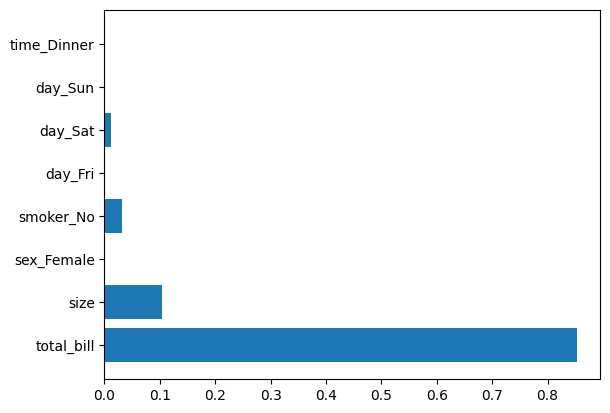

In [54]:
plt.barh(model.feature_names_in_ ,model.feature_importances_)

## Minimal Cost Complexity Pruning

In [57]:
model = tree.DecisionTreeRegressor(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)

In [65]:
eff_alphas = path.ccp_alphas

In [66]:
models = []
for eff_alpha in eff_alphas:
    model = tree.DecisionTreeRegressor(ccp_alpha=eff_alpha, random_state=0)
    model.fit(X_train, y_train)
    models.append(model)
    

In [72]:
from sklearn.metrics import mean_squared_error

train_scores = [mean_squared_error(y_train ,model.predict(X_train)) for model in models]
test_scores = [mean_squared_error(y_test ,model.predict(X_test)) for model in models]

Text(0, 0.5, 'MSE')

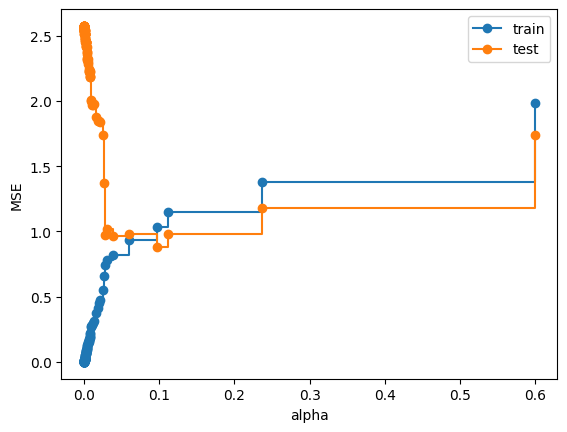

In [76]:
plt.plot(eff_alphas, train_scores, marker='o', label='train', drawstyle = "steps-post")
plt.plot(eff_alphas, test_scores, marker='o', label='test', drawstyle = "steps-post")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')

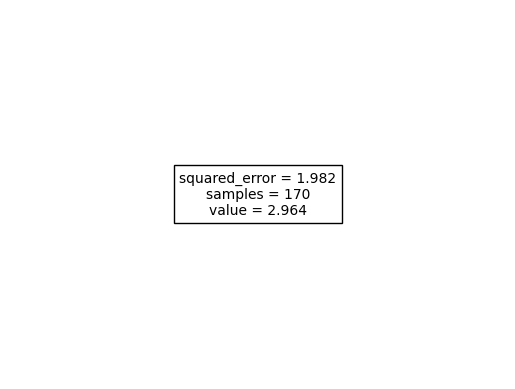

In [77]:
_ = tree.plot_tree(models[-1], fontsize=10, feature_names=model.feature_names_in_)